# Dynamic Programming

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define MDP parameters
N = 100
p = 0.5
q_low = 0.51
q_high = 0.6
c_low = 0
c_high = 0.01
gamma = 0.9
# a_low = "alow"
# a_high = "ahigh"
# action=[a_low,a_high]

In [ ]:
# Define the reward function
def reward(x, a):
  return -(x/N)**2 - (c_low if a == 0 else c_high)

reward_low=np.zeros((N))
reward_high=np.zeros((N))
for s in range(0,N):
  # for a in range(0,2):
    reward_low[s]= reward(s,0)
    reward_high[s]= reward(s,1)



In [ ]:
# Define the transition function
# the probability of state y given state x and action a
def grid_env(N):
  T = np.zeros((N, N, 2))

  for a in range(0,2):

    p_inc = p
    p_dec = q_low if a == 0 else q_high

    p00= (1-p_inc) * (1-p_dec)
    p11= p_inc * p_dec
    p10= p_inc*(1-p_dec)
    p01= (1-p_inc)*p_dec

    for x in range(0,N):
      #inc=dec=0 or inc=dec=1
      T[x,x,a]= p00 + p11

      #inc=1 dec=0
      if(x==N-1):
        T[x,x,a] += p10
      else: T[x, x+1,a]= p10

      #inc=0 dec=1
      if(x==0):
        T[x,x,a] += p01
      else: T[x,x-1,a]= p01

  return T

In [ ]:
# Define transition function matrix and the rewards for the problem
P = grid_env(N)

r_lazy=reward_low

first_50_of_low = reward_low[:50]
last_50_of_high = reward_high[-50:]
r_aggr = []
r_aggr.extend(first_50_of_low)
r_aggr.extend(last_50_of_high)






>  Problem 1: Policy evaluation



In [ ]:
# define policies
# prob of actian a in state x

policy_lazy= np.zeros((N,2))
for i in range(0,N):
  policy_lazy[i,0]=1


policy_aggr= np.zeros((N,2))
for i in range(0,50):
  policy_aggr[i,0]=1
for i in range(50,N):
  policy_aggr[i,1]=1


In [ ]:
# transition matrix for policy
def trans(P,policy):

    P_pi = np.zeros((N,N))

    for x in range(N):
      for a in range(2):
        for y in range(N):
          P_pi[x,y]=P_pi[x,y] + policy[x,a] * P[x,y,a]

    return P_pi


In [ ]:
# policy evaluation subroutine
# inverting the matrix (I - gamma P_pi)
def evaluate(P,policy,reward):
    value = np.zeros((N))

    P_pi=trans(P,policy)
    value= np.linalg.solve(np.eye(N)-gamma*P_pi,reward)

    return value


[-3.18660071e-03 -4.63177110e-03 -7.78298975e-03 -1.27784712e-02
 -1.96914422e-02 -2.85606988e-02 -3.94067951e-02 -5.22406211e-02
 -6.70679462e-02 -8.38918271e-02 -1.02713883e-01 -1.23534973e-01
 -1.46355550e-01 -1.71175855e-01 -1.97996017e-01 -2.26816103e-01
 -2.57636149e-01 -2.90456173e-01 -3.25276186e-01 -3.62096192e-01
 -4.00916196e-01 -4.41736198e-01 -4.84556199e-01 -5.29376199e-01
 -5.76196200e-01 -6.25016200e-01 -6.75836200e-01 -7.28656200e-01
 -7.83476200e-01 -8.40296200e-01 -8.99116200e-01 -9.59936200e-01
 -1.02275620e+00 -1.08757620e+00 -1.15439620e+00 -1.22321620e+00
 -1.29403620e+00 -1.36685620e+00 -1.44167620e+00 -1.51849620e+00
 -1.59731620e+00 -1.67813620e+00 -1.76095620e+00 -1.84577620e+00
 -1.93259620e+00 -2.02141620e+00 -2.11223620e+00 -2.20505620e+00
 -2.29987620e+00 -2.39669620e+00 -2.49551620e+00 -2.59633620e+00
 -2.69915620e+00 -2.80397620e+00 -2.91079620e+00 -3.01961620e+00
 -3.13043620e+00 -3.24325620e+00 -3.35807620e+00 -3.47489620e+00
 -3.59371620e+00 -3.71453

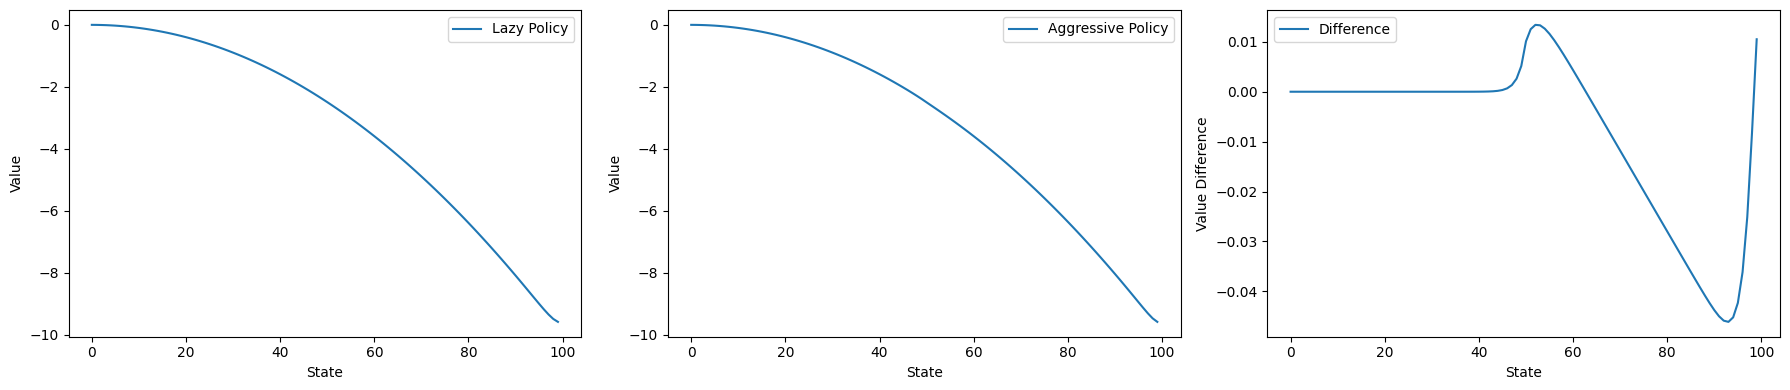

Lazy Policy Value at State 50: -2.495516199999999
Lazy Policy Value at State 80: -6.39011564760478
Aggressive Policy Value at State 50: -2.505626101063741
Aggressive Policy Value at State 80: -6.362119989336483


In [ ]:

value_lazy = evaluate(P, policy_lazy, r_lazy)
value_aggr = evaluate(P, policy_aggr, r_aggr)

print(value_lazy)
print(value_aggr)

diff = value_lazy - value_aggr


plt.figure(figsize=(18, 4))

# Plot value function for lazy policy
plt.subplot(1, 3, 1)
plt.plot(value_lazy, label='Lazy Policy')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

# Plot value function for aggressive policy
plt.subplot(1, 3, 2)
plt.plot(value_aggr, label='Aggressive Policy')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

# Plot the difference between the 2 value functions
plt.subplot(1, 3, 3)
plt.plot(diff, label='Difference')
plt.xlabel('State')
plt.ylabel('Value Difference')
plt.legend()

plt.tight_layout()
plt.show()

# Print specific values from the value functions
print(f"Lazy Policy Value at State 50: {value_lazy[50]}")
print(f"Lazy Policy Value at State 80: {value_lazy[80]}")
print(f"Aggressive Policy Value at State 50: {value_aggr[50]}")
print(f"Aggressive Policy Value at State 80: {value_aggr[80]}")

# in 50 lazy better, in 80 aggressive better



> Problem 2: Value Iteration and Policy Iteration



In [ ]:
### value iteration
# P: X by X by A transition matrix
# max_iter: number of iterations
def value_iteration(P,max_iter):

    V=np.zeros(N)
    for k in range(max_iter):
      V_new = np.zeros(N)
      for x in range(N):
        q_values = []
        for a in range(2):
          q= reward(x,a) + gamma * np.dot(P[x,:,a],V)
          q_values.append(q)
        V_new[x]=np.max(q_values)
      V= V_new.copy()

    return V

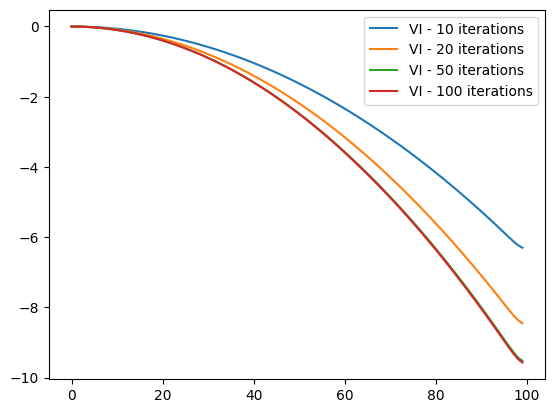

In [ ]:
vi_10 = value_iteration(P, 10)
vi_20 = value_iteration(P, 20)
vi_50 = value_iteration(P, 50)
vi_100 = value_iteration(P, 100)

plt.plot(vi_10, label='VI - 10 iterations')
plt.plot(vi_20, label='VI - 20 iterations')
plt.plot(vi_50, label='VI - 50 iterations')
plt.plot(vi_100, label='VI - 100 iterations')
plt.legend()
plt.show()

As shown in the graph above, **Value Iteration** converges to the optimal value function after **50 iterations**

In [ ]:
# extract the policy out of a value function
def extract_policy(V):
    policy = np.zeros(N)
    for s in range(N):
        Q_sa = np.zeros(2)
        for a in range(2):
            for next_state in range(N):
                Q_sa[a] += (reward(s, a) + gamma * V[next_state]) * P[s, next_state, a]
        policy[s] = np.argmax(Q_sa)
    return policy

optimal_policy = extract_policy(value_iteration(P,50))
print("Optimal Policy:",optimal_policy)

Optimal Policy: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0.]


In [ ]:
### policy iteration
# P: X by X by A transition matrix
# max_iter: number of iterations
def policy_iteration(P, max_iter):

    # Initialize a random policy
    policy = np.zeros((N, 2))
    for x in range(N):
        policy[x, np.random.choice(2)] = 1  # Randomly choose an action for each state

    for k in range(max_iter):

        # Policy Evaluation
        reward_vector = np.array([reward(x, np.argmax(policy[x])) for x in range(N)])
        V = evaluate(P, policy, reward_vector)

        # Policy Improvement
        policy_stable = True
        for x in range(N):
            old_action = np.argmax(policy[x])
            action_values = [reward(x, a) + gamma * np.dot(P[x, :, a], V) for a in range(2)]
            best_action = np.argmax(action_values)

            policy[x] = np.zeros(2)
            policy[x, best_action] = 1

            if old_action != best_action:
                policy_stable = False

        # Break if the policy is stable
        if policy_stable:
            # print("Policy stable after iteration",k)
            break

    return V


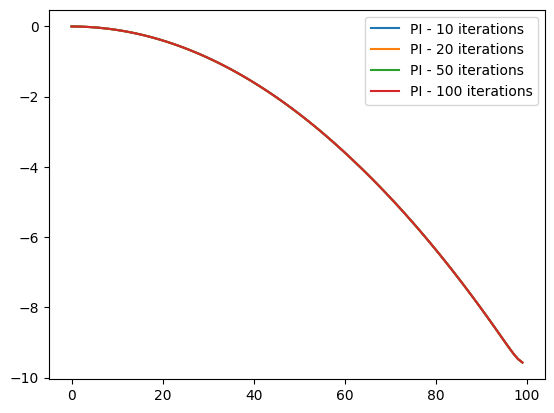

In [ ]:
pi_10 = policy_iteration(P, 10)
pi_20 = policy_iteration(P, 20)
pi_50 = policy_iteration(P, 50)
pi_100 = policy_iteration(P, 100)

plt.plot(pi_10, label='PI - 10 iterations')
plt.plot(pi_20, label='PI - 20 iterations')
plt.plot(pi_50, label='PI - 50 iterations')
plt.plot(pi_100, label='PI - 100 iterations')
plt.legend()
plt.show()

**Policy Iteration** converges faster to the optimal value function, after just **one iteration** starting from a random generated value function.

In [ ]:
import time

start_time = time.time()
value_iteration(P, 100)
vi_runtime = time.time() - start_time

start_time = time.time()
policy_iteration(P, 100)
pi_runtime = time.time() - start_time

print(f"Runtime for Value Iteration: {vi_runtime} seconds")
print(f"Runtime for Policy Iteration: {pi_runtime} seconds")


Runtime for Value Iteration: 0.24954509735107422 seconds
Runtime for Policy Iteration: 0.11185693740844727 seconds


Policiy Iteration runtime is shown as being smaller than value iteration's. That is because it converges after the first iteration and the current code breaks when it reaches a stable policy (no new changes are made).

Anyhow, if we comment  `if policy_stable:` , and therefore actually effectuate all 100 iterations, its runtime will be over 3 seconds, so way way bigger than value iteration's one.

In Value Iteration each iteration is typically fast, but it may require many iterations to converge, while Policy Iteration tends to converge in fewer iterations than Value Iteration, but each iteration (especially the policy evaluation step) can be more computationally costly.



In [1]:

V_lazy = evaluate(P, policy_lazy, r_lazy)
V_aggr = evaluate(P, policy_aggr, r_aggr)

V_star = policy_iteration(P,10)

diff_lazy = V_star - V_lazy
diff_aggr = V_star - V_aggr

# Plotting the differences
plt.plot(diff_lazy, label='V* - V_lazy')
plt.plot(diff_aggr, label='V* - V_aggr')
plt.xlabel('State')
plt.ylabel('Value Difference')
plt.title('Difference Between Optimal Value Function and Basic Policies')
plt.legend()
plt.show()

# Verification of strict improvement
strict_improvement_lazy = all(diff_lazy > 0)
strict_improvement_aggr = all(diff_aggr > 0)

print("Strict improvement over policy_lazy:", strict_improvement_lazy)
print("Strict improvement over policy_aggr:", strict_improvement_aggr)



NameError: ignored

There are strict improvements over the lazy policy because that one does the oposite of the optimal policy - it always choses a_low (0). The aggresive policy takes action a_high (1) in half of the states so the improvement is not strict with regards to the optimal solution which is always takes a_high.